# Análisis de Estado Estable

## Probabilidades de estado estable

Podemos utilizar la ecuación de Chapman-Kolgomorov para analizar la evolución de las probabilidades de transición de $n$-pasos. Utilicemos los datos de la parte anterior:

In [1]:
import numpy as np
p = np.array([[0.7, 0.1, 0.2], [0.2, 0.7, 0.1], [0.5, 0.2, 0.3]])
p

array([[0.7, 0.1, 0.2],
       [0.2, 0.7, 0.1],
       [0.5, 0.2, 0.3]])

In [2]:
p2 = p @ p
p2

array([[0.61, 0.18, 0.21],
       [0.33, 0.53, 0.14],
       [0.54, 0.25, 0.21]])

In [3]:
p4 = p2 @ p2
p4

array([[0.5449, 0.2577, 0.1974],
       [0.4518, 0.3753, 0.1729],
       [0.5253, 0.2822, 0.1925]])

In [4]:
p8 = p4 @ p4
p8

array([[0.51703909, 0.29284182, 0.19011909],
       [0.50657073, 0.30607133, 0.18735794],
       [0.51485418, 0.29560297, 0.18954285]])

In [5]:
p16 = p8 @ p8
p16

array([[0.51355812, 0.29724092, 0.18920096],
       [0.51342566, 0.29740832, 0.18916602],
       [0.51353048, 0.29727586, 0.18919366]])

En este caso, es notable observar como los valores en cada columna van convergiendo a un mismo valor.

Esta es una propiedad que tienen todas las cadenas de Markov que forman un conjunto irreducible no periódico. Estas cadenas también se conocen como **ergódicas**.

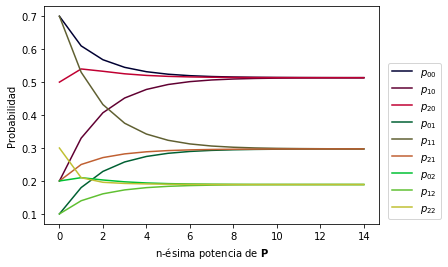

In [11]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
nt = 15 
pt = np.empty(3 * 3 * nt)
pt.shape = (3, 3, nt)
p_aux = p
n, m = p.shape
for t in range(nt):
    pt[:, :, t] = p_aux
    p_aux = p_aux @ p

for j in range(n):
    for k in range(m):
        plt.plot(pt[k, j], color=f"#{format(k*96, '02x')}{format(j*96, '02x')}32", label=f'$p_{{{k}{j}}}$')
ax.set_xlabel('n-ésima potencia de $\mathbf{P}$')
ax.set_ylabel('Probabilidad')
plt.legend(loc='lower right', bbox_to_anchor=(1.2, 0))
plt.show()


Se puede observar que cada grupo de líneas que corresponden a las probabilidades de n-ésimo paso de una misma columna convergen. Estos valores a los que convergen todos los valores de una misma columna se conocen como **Probabilidades de estado estable** que se denotan por $\mathbf{\Pi} = \lim\limits_{n \to \infty}\mathbf{P}^n$, y pueden calcularse directamente observando que en algún momento:

\begin{equation}
    \mathbf{\Pi} \cdot \mathbf{P} = \mathbf{\Pi}
\end{equation}

Lo que implica que:

\begin{equation}
    \pi_j = \sum_{i=1}^{N}\pi_i p_{ij}~\forall j=1, 2, \dots, N
\end{equation}

Esto conduce al sistema de ecuaciones:

\begin{equation}
     [\mathbf{P}^t - \mathbf{I}]~\mathbf{\Pi} = \mathbf{0}
\end{equation}

Como todas las ecuaciones quedan igualadas a cero se genera una dependencia lineal, por lo que se debe sustituir una de estas ecuaciones (es decir, una fila del sistema anterior) por el hecho que: 

\begin{equation}
    \sum_{i=1}^{N}\pi_i = 1
\end{equation}

Así, podemos resolverlo matricialmente mediante la siguiente función:

In [8]:
def steady_state(p):
    n = p.shape[0]
    a = p.T - np.eye(n)
    a[n - 1, :] = np.ones(n)
    b = np.append(np.zeros(n - 1), 1)
    return np.linalg.solve(a, b)

In [9]:
from IPython.display import display, Markdown

pi = steady_state(p)
display(Markdown(rf'$\pi_{{1}} =$ {pi[0]:.6f}'))
display(Markdown(rf'$\pi_{{2}} =$ {pi[1]:.6f}'))
display(Markdown(rf'$\pi_{{3}} =$ {pi[2]:.6f}'))

$\pi_{1} =$ 0.513514

$\pi_{2} =$ 0.297297

$\pi_{3} =$ 0.189189

La forma básica en la que pueden interpretarse estos valores es la probabilidad de que el sistema (representado por la cadena de markov) se encuentre en uno estado específico después de un número suficientemente grande de transiciones.

En este caso, $\pi_{1} = 0.513514$ indica que la probabilidad de conseguir un día soleado dentro de 100 o 200 días es aproximadamente $0.51$, independientemente del estado del clima de hoy.

Hay otra interpretación probablemente más interesante de las probabilidades de estado estable, a partir del propio concepto de la probabilidad como frecuencia relativa, y es que de un número suficientemente grande de días, estas probabilidades representan el número de estimado de ocurrencias de un estado.

En este caso, en un año el número de días soleados estaría dado por:

In [10]:
365 * pi[0]

187.4324324324324

Esto indica que poco más de $187$ días al año serán soleados. Y en general, que el $51.35 \%$ de los días serán soleados.